The introduction of online payment systems has helped a lot in the ease of payments. 

    But, at the same time, it increased in payment frauds. 

Online payment frauds can happen with anyone using any payment system, 
        
    especially while making payments using a credit card. 
        
That is why detecting online payment fraud is very important for credit card companies 
        
    to ensure that the customers are not getting charged for the products and services they never paid.

In [67]:
# this Kaggle dataset contains historical information about
    #fraudulent transactions which can be used to detect fraud in online payments
    
    #Wbblink to downlaod https://www.kaggle.com/ealaxi/paysim1/download
        # As file is very heavy (470 MB),
            # I cant upload the same on GitHub (25 MB limit)

import pandas as pd
df = pd.read_csv('creditcard1.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [68]:
# step: represents a unit of time where 1 step equals 1 hour
# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction

# Output / Dependent -- feature / column
    # isFraud: fraud transaction

In [69]:
# let’s check whether this dataset has any null values or not:
df.isnull().sum()

# So, this dataset does not have any null values.

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [70]:
# the split of "TYPE" column of transaction mentioned in the dataset:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [71]:
# Let's VISUALIZE the split of "TYPE" column of transaction 

#type = df.type.value_counts()
#transactions = type.index
#quantity = type.values

import plotly.express as px
figure = px.pie(df,
               values = df.type.value_counts().values,
               names = df.type.value_counts().index,
               hole = 0.5, #50%
               title = "Distribution of Transaction Type")
figure.show()

In [72]:
 # let’s transform / MAP the categorical features into numerical. 
    
df.type = df.type.map({'CASH_OUT':1,
                       'PAYMENT':2,
                       'CASH_IN':3,
                       'TRANSFER':4,
                       'DEBIT':5})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [86]:
# Lets check correlation between 
    # the features of the data with the "isFraud" column:
    
correlation = df.corr()
correlation.isFraud.sort_values(ascending=False)

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64

In [88]:
# Let's transform / MAP the Numerical values of 
    # the "isFraud" column into "No Fraud" and "Fraud" Categorical labels 
    # to have a better understanding of the output:
    
df.isFraud = df.isFraud.map({1:'Fraud',
                             0:'No Fraud'})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,2,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,2,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,1,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [98]:
#  Let's split the data into in-dependent(X) columns
X = df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]]
X

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [99]:
#AND
#  Let's split the data into dependent (Y) column
Y = df[["isFraud"]]
Y

,isFraud
0,No Fraud
1,No Fraud
2,Fraud
3,Fraud
4,No Fraud
...,...
6362615,Fraud
6362616,Fraud
6362617,Fraud
6362618,Fraud


In [105]:
#  Let's split the data into training and test sets:

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,
                                               test_size=0.33,
                                               random_state=42)

## Decision Tree Classifier
The decision tree builds classification or regression models in the form of a tree structure. 

It breaks down a dataset into smaller subsets with an increase in depth of the tree. 

The final result is a tree with decision nodes and leaf nodes. 

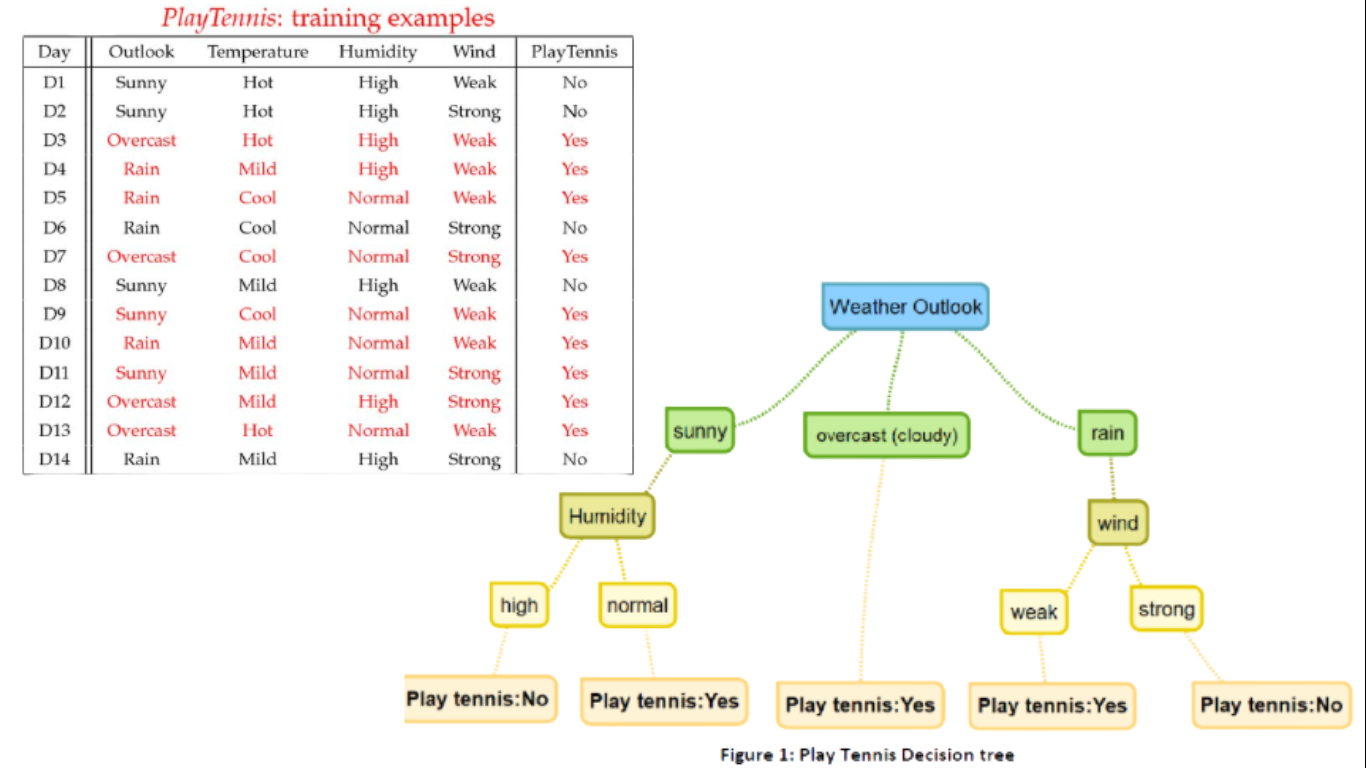

In [106]:
# Lets train "DecisionTreeClassifier" model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [114]:
# Lets calculate the ACCURACY of our "DecisionTreeClassifier" model
accuracy = model.score(Xtest, Ytest) 
print(accuracy)

print("accuracy is", "%.2f" % (accuracy * 100), " %")
# ""%.2f" %" limit the float to 2 decimal places

0.9996785201448802
accuracy is 99.97  %


### Prediction

In [115]:
Xtest

,type,amount,oldbalanceOrg,newbalanceOrig
3737323,3,330218.42,20866.00,351084.42
264914,2,11647.08,30370.00,18722.92
85647,3,152264.21,106589.00,258853.21
5899326,4,1551760.63,0.00,0.00
2544263,3,78172.30,2921331.58,2999503.88
...,...,...,...,...
4530160,1,180122.47,86691.38,0.00
2350116,2,14663.84,445.00,0.00
6022649,3,99294.65,11156.00,110450.65
4697125,2,3871.35,70355.00,66483.65


In [125]:
 # let’s classify whether a transaction is a fraud or not by feeding about a transaction into the model:
#features = [type, amount, oldbalanceOrg, newbalanceOrig]
model.predict([[3, 330218.42, 20866.00, 351084.42]])

array(['No Fraud'], dtype=object)

In [123]:
Ytest

,isFraud
3737323,No Fraud
264914,No Fraud
85647,No Fraud
5899326,No Fraud
2544263,No Fraud
...,...
4530160,No Fraud
2350116,No Fraud
6022649,No Fraud
4697125,No Fraud


In [126]:
# Detecting online payment frauds is 
    #one of the applications of data science in finance-technology startps / companies
        #So, If you are applying for such fin-tech roles / companies,
            # include this project in your resume / CV